29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
loaded data
class names
resized images
created model
Epoch 1/4


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7687 - loss: 0.6365 - val_accuracy: 0.8832 - val_loss: 0.3251
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8919 - loss: 0.2971 - val_accuracy: 0.9026 - val_loss: 0.2728
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9092 - loss: 0.2451 - val_accuracy: 0.9078 - val_loss: 0.2578
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9202 - loss: 0.2134 - val_accuracy: 0.9075 - val_loss: 0.2588
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9088 - loss: 0.2601
Test accuracy: 0.9075000286102295
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


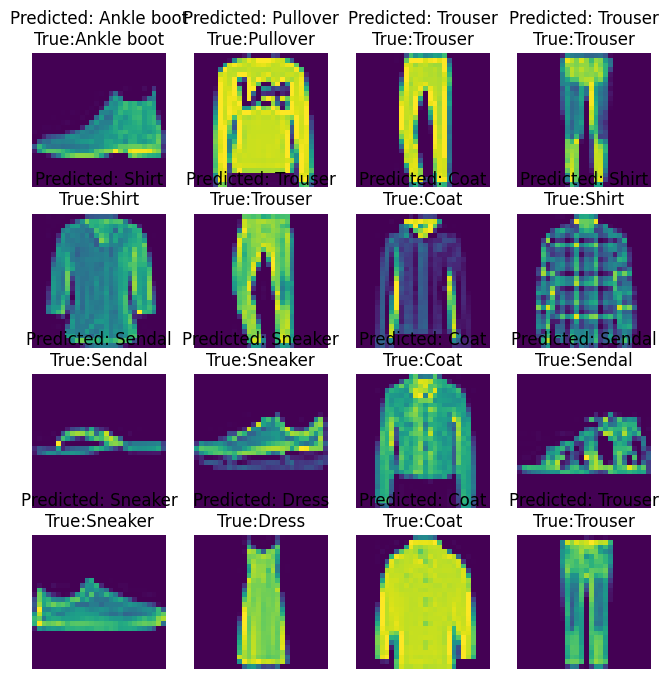

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import os

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print('loaded data')

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sendal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('class names')

train_images = train_images / 255.0
test_images = test_images /255.0
print('resized images')

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
print('created model')

initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.98, staircase=True
)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images,
                    train_labels,
                    epochs=4,
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

predictions = model.predict(test_images)

fig = plt.figure(figsize=(8,8))

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1)
    ax.imshow(test_images[i])
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    ax.set_title("Predicted: {}\nTrue:{}".format(class_names[predicted_label], class_names[true_label]))
    ax.axis('off')

plt.show()

# Imports

In [15]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from PIL import Image
#from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.layers.experimental import preprocessing

# Model Architecture
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

# System libraries
from pathlib import Path
import os.path

# Visualization Libraries
import matplotlib.pyplot as plt
#%matplotlib inline
import cv2
import seaborn as sns

# Metrics
#from sklearn.metrics import classification_report, confusion_matrix
import itertools

# Model Hypertunning
import keras_tuner as kt